In [2]:
import matplotlib.pyplot as plt
import pandas as pd

data_home = 'https://github.com/dknife/ML/raw/main/data/'
lin_data = pd.read_csv(data_home+'pollution.csv')
print(lin_data)

       input  pollution
0   0.240557   4.858750
1   0.159731   4.471091
2   0.108295   4.341897
3   0.233770   3.586844
4   0.283235   3.678243
..       ...        ...
95  0.070824   4.851617
96  0.055300   4.912696
97  0.138229   5.516441
98  0.007205   5.661260
99  0.290294   3.169049

[100 rows x 2 columns]


In [10]:
from sklearn.model_selection import train_test_split

data_loc = 'https://github.com/dknife/ML/raw/main/data/'
life = pd.read_csv(data_loc + 'life_expectancy.csv')
life.dropna(inplace=True)

In [11]:
X = life[['Alcohol','Percentage expenditure','Polio','BMI','GDP','Thinness 1-19 years']]
y = life['Life expectancy']

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [34]:
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()
lin_model.fit(X_train,y_train) #학습

LinearRegression()

In [35]:
y_hat_test = lin_model.predict(X_test)

In [36]:
from sklearn.metrics import mean_squared_error
print('Mean squared error:', mean_squared_error(y_test,y_hat_test))

Mean squared error: 40.44188325137907


In [37]:
from sklearn.preprocessing import normalize

n_X  = normalize(X, axis = 0)

In [52]:
nXtrain, nXtest, y_train, y_test = train_test_split(n_X, y, test_size = 0.2)

In [53]:
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()
lin_model.fit(nXtrain, y_train)

LinearRegression()

In [54]:
y_hat_test = lin_model.predict(nXtest)
from sklearn.metrics import mean_squared_error
print('Mean squared error:', mean_squared_error(y_test,y_hat_test))

Mean squared error: 34.69811895896962


### p.129 4.1 심화문제

In [93]:
df = pd.DataFrame({
    'name': ['A','B','C','D','E','F','G'],
    'horse power' : [130,250,190,300,210,220,170],
    'efficiency' : [16.3,10.2,11.1,7.1,12.1,13.2,14.2]
})

vehicle_df = df.set_index('name')
vehicle_df

,horse power,efficiency
name,,
A,130,16.3
B,250,10.2
C,190,11.1
D,300,7.1
E,210,12.1
F,220,13.2
G,170,14.2


In [94]:
from sklearn.linear_model import LinearRegression
X = vehicle_df[['horse power']] #linearregression은 2차원 리스트만 입력받음
y = vehicle_df['efficiency']

In [95]:
lin_model1 = LinearRegression()
lin_model1.fit(X,y)

LinearRegression()

In [98]:
#계수값
print('계수 :', lin_model1.coef_)
print('절편 :', lin_model1.intercept_)
print('예측 점수 :', lin_model1.score(X,y))
print('270 마력 자동차의 예상 연비 :', lin_model1.predict([[270]])[0].round(2),'km/L')

계수 : [-0.05027473]
절편 : 22.58626373626374
예측 점수 : 0.8706727649378525
270 마력 자동차의 예상 연비 : 9.01 km/L


c:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### 심화문제 4.2

In [101]:
df = pd.DataFrame({
    'name': ['A','B','C','D','E','F','G'],
    'horse power' : [130,250,190,300,210,220,170],
    'weight' : [1900,2600,2200,2900,2400,2300,2100],
    'efficiency' : [16.3,10.2,11.1,7.1,12.1,13.2,14.2]
})

vehicle_df = df.set_index('name')
vehicle_df

,horse power,weight,efficiency
name,,,
A,130,1900,16.3
B,250,2600,10.2
C,190,2200,11.1
D,300,2900,7.1
E,210,2400,12.1
F,220,2300,13.2
G,170,2100,14.2


In [102]:
from sklearn.linear_model import LinearRegression
X = vehicle_df[['horse power','weight']] #linearregression은 2차원 리스트만 입력받음
y = vehicle_df['efficiency']

In [103]:
lin_model2 = LinearRegression()
lin_model2.fit(X,y)

LinearRegression()

In [104]:
#계수값
print('계수 :', lin_model2.coef_)
print('절편 :', lin_model2.intercept_)
print('예측 점수 :', lin_model2.score(X,y))

계수 : [-0.00689189 -0.00731081]
절편 : 30.60405405405406
예측 점수 : 0.8871254041192391


In [105]:
print('270 마력 자동차의 예상 연비 :', lin_model2.predict([[270,2500]])[0].round(2),'km/L')

270 마력 자동차의 예상 연비 : 10.47 km/L


c:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


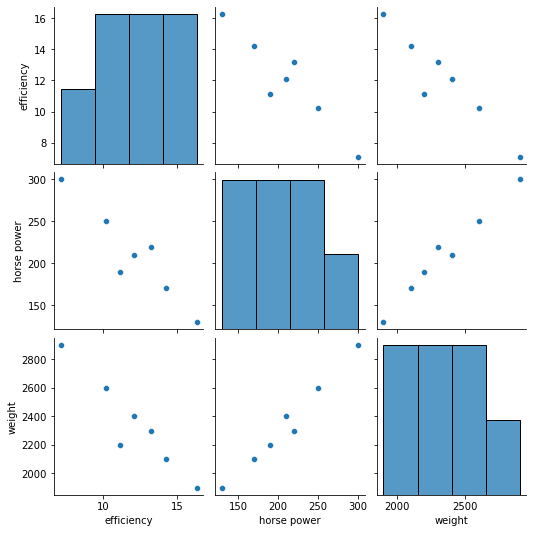

In [107]:
# 3.
import seaborn as sns
sns.pairplot(vehicle_df[['efficiency','horse power','weight']])
plt.show()

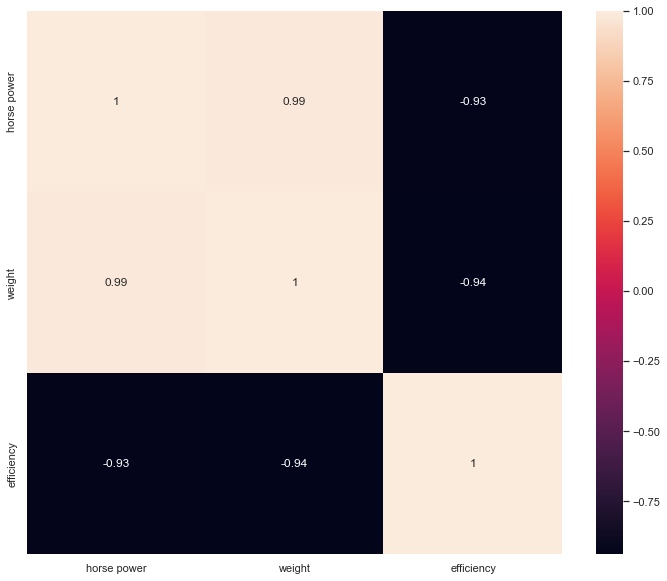

In [108]:
#4.
sns.set(rc={'figure.figsize':(12,10)})    # 상관행렬 가시
correlation_matrix = vehicle_df.corr().round(2) # 상관행렬 생성
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

#### 5.
```
1. 변수들간의 모든 선형 관계가 보인다.
2. 마력과 총중량은 -0.94만큼 상관관계가 있다.
3. 마력과 연비는 -0.93만큼 상관관계가 있다.
```